# Introduction to Image Processing : Brief Overview

## Step 1: Load necessary libraries (dependencies)

* **Numpy** is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* **Pandas** is a library for data manipulation and data analysis.
* **CV2** is a library for computer vision tasks.
* **Skimage** is a library which supports image processing applications on python.
* **Matplotlib** is a library which generates figures and provides graphical user interface toolkit.

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

## STEP 2: Importing Image and viewing it

> Import the image through a URL and find its metadata





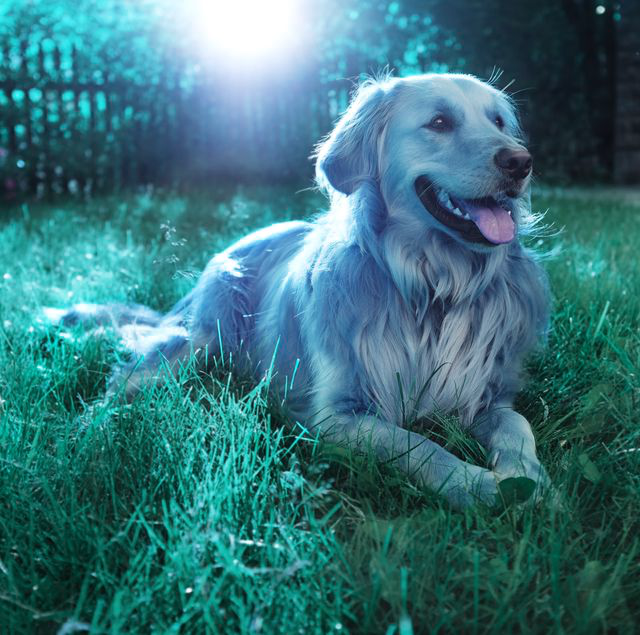

In [4]:
url = "https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg?crop=0.672xw:1.00xh;0.166xw,0&resize=640:*"
myImg = io.imread(url)
cv2_imshow(myImg)
#cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))

In [5]:
# Check the image matrix data type (could know the bit depth of the image)
print(myImg.dtype)
# Check the height of image 
print(myImg.shape[0])
# Check the width of image 
print(myImg.shape[1])
# Check the number of channels of the image
print(myImg.shape[2])

uint8
635
640
3


## Step 3: Histogram and Image Manipulation



> You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.


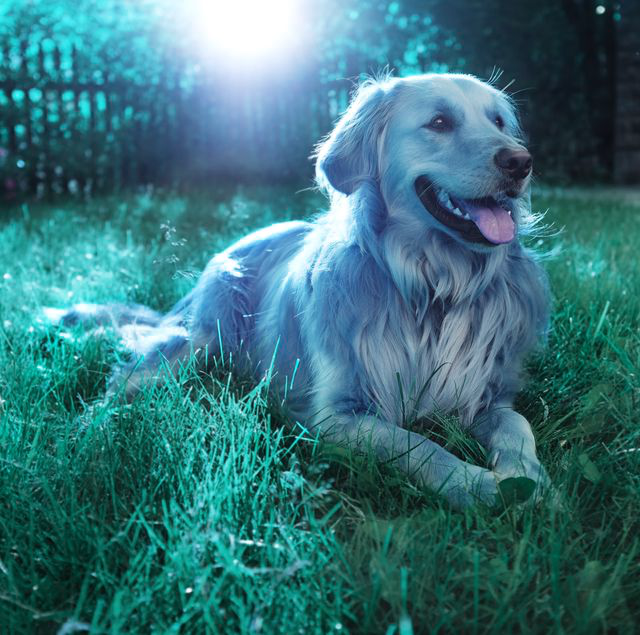

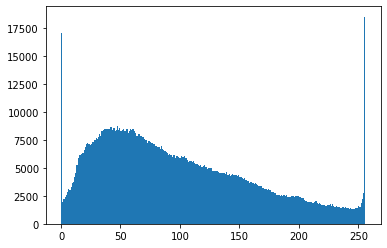

In [8]:
plt.hist(myImg.ravel(),bins = 256, range = [0,256]) 
cv2_imshow(myImg)
plt.show()

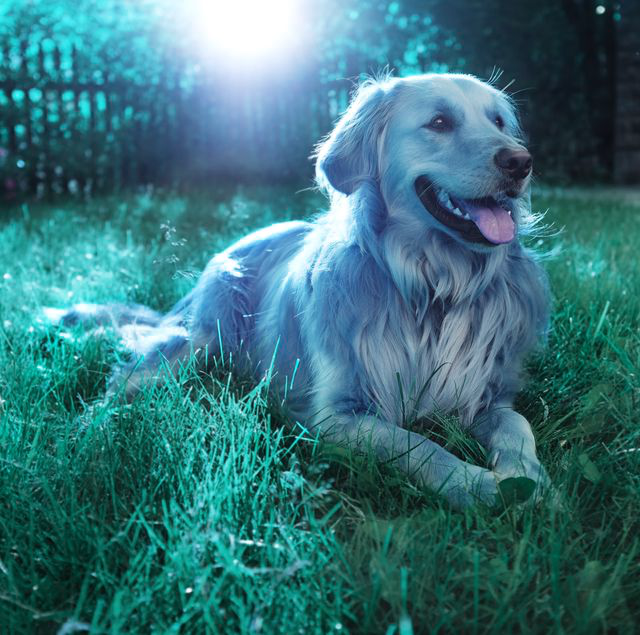

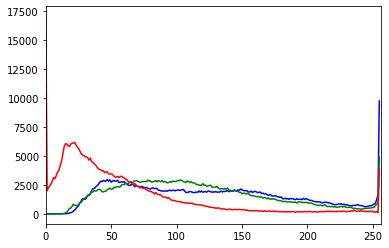

In [9]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([myImg],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
cv2_imshow(myImg)
plt.show()

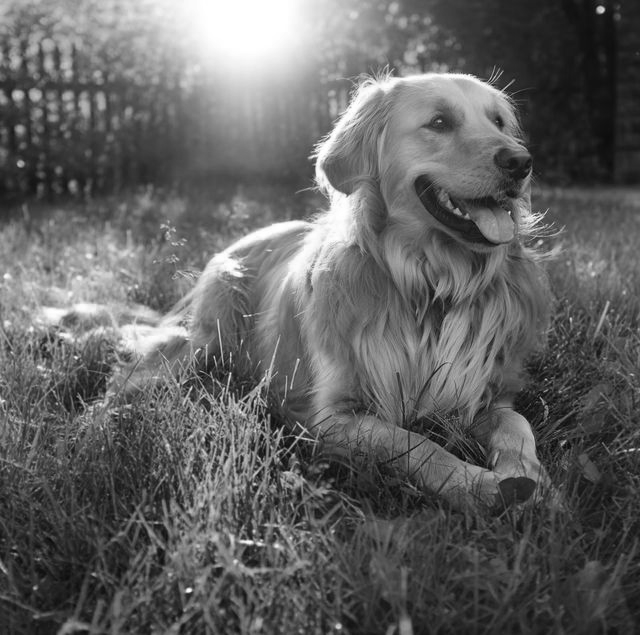

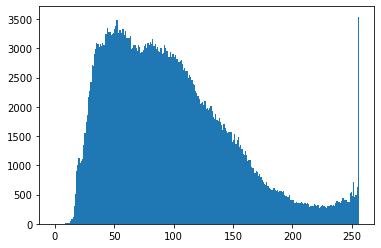

In [11]:
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

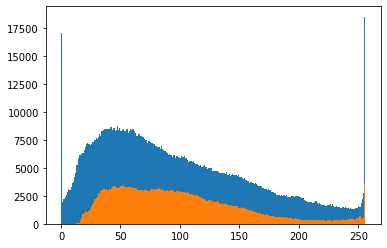

In [12]:
plt.hist(myImg.ravel(),bins = 256, range = [0,256]) 
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

In [ ]:
data = np.asarray(gray_image)
print(data)

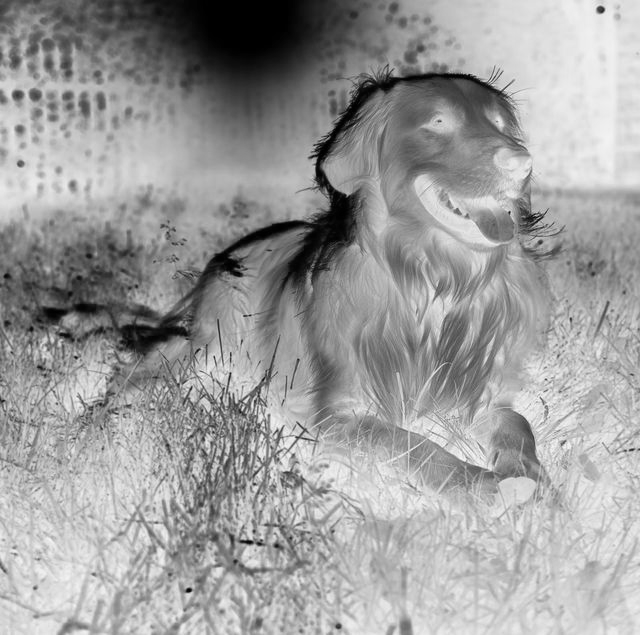

In [18]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

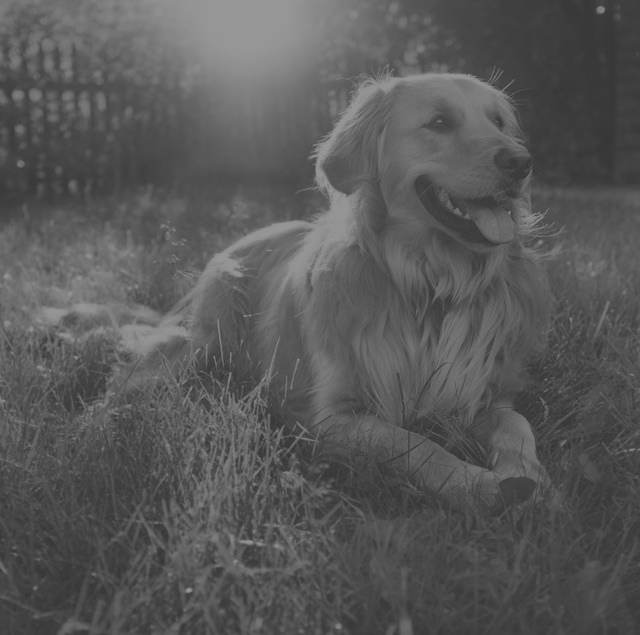

In [19]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 50
cv2_imshow(im3)

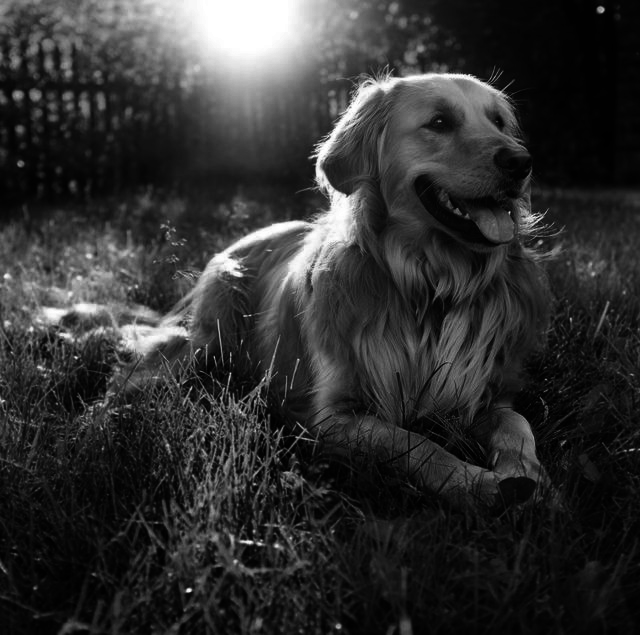

In [20]:
# The lightness level of the gray_image decreases after this step
im4 = 255 * (gray_image/255.0) ** 2
cv2_imshow(im4)

## Step 4 : Edge Detection example

Method 1: Using Fourier transform 

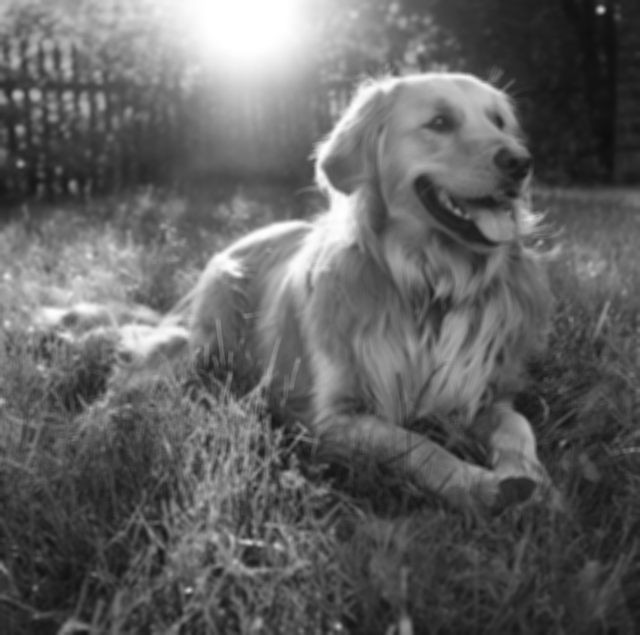

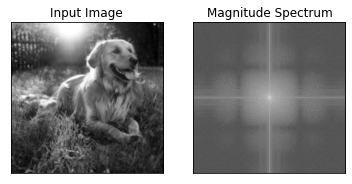

(Text(0.5, 1.0, 'Image after HPF'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

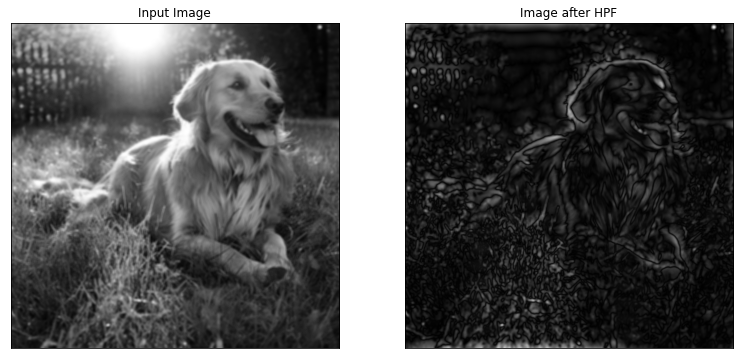

In [25]:
# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
cv2_imshow(imBlur)

# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])


Method 2: Using OpenCV library

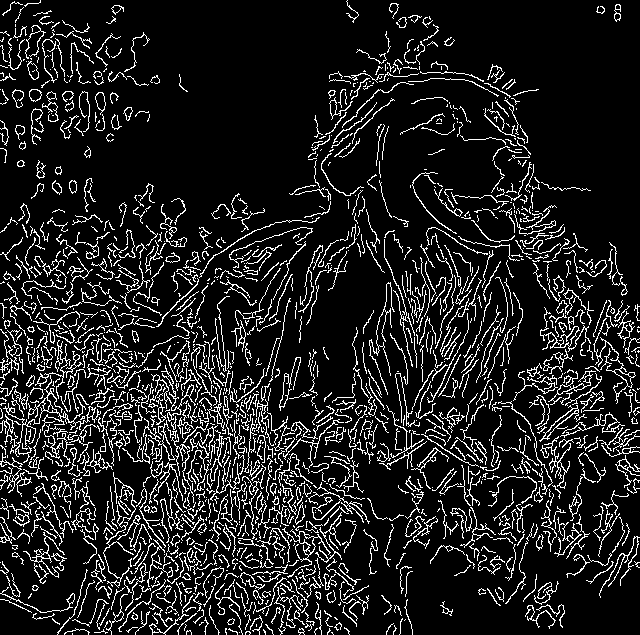

In [37]:
# Canny Edge Detection
edges = cv.Canny(image=imBlur, threshold1=10, threshold2=75)
# Display Canny Edge Detection Image
cv2_imshow(edges)